In [126]:
# Load the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [127]:
# Read file into dataframe
df_tweets = pd.read_csv('../06_Feature Selection & Engineering/dataset_tweets_featured.csv', sep=',', encoding='utf-8')
print(df_tweets.shape)
df_tweets.head

(47692, 12)


<bound method NDFrame.head of                                               tweet_text cyberbullying_type  \
0      IN OTHER WORDS #KATANDANDRE, YOUR FOOD WAS CRA...  not_cyberbullying   
1      WHY IS #AUSSIETV SO WHITE? #MKR #THEBLOCK #IMA...  not_cyberbullying   
2      @XOCHITLSUCKKKS A CLASSY WHORE? OR MORE RED VE...  not_cyberbullying   
3      @JASON_GIO MEH. :P  THANKS FOR THE HEADS UP, B...  not_cyberbullying   
4      @RUDHOEENGLISH THIS IS AN ISIS ACCOUNT PRETEND...  not_cyberbullying   
...                                                  ...                ...   
47687  BLACK PPL AREN'T EXPECTED TO DO ANYTHING, DEPE...          ethnicity   
47688  TURNER DID NOT WITHHOLD HIS DISAPPOINTMENT. TU...          ethnicity   
47689  I SWEAR TO GOD. THIS DUMB NIGGER BITCH. I HAVE...          ethnicity   
47690  YEA FUCK YOU RT @THEREALEXEL: IF YOURE A NIGGE...          ethnicity   
47691  BRO. U GOTTA CHILL RT @CHILLSHRAMMY: DOG FUCK ...          ethnicity   

       harass  cybers

Drop the Column 'tweet_text'

In [128]:
df_tweets = df_tweets[['cyberbullying_type', 'harass', 'cyberstalk', 'flaming', 'outing', 'doxing', 'exclusion', 'impersonation', 'trolling', 'hateSpeech', 'threats']]

In [130]:
df_tweets['cyberbullying_type'].unique()

array(['not_cyberbullying', 'gender', 'religion', 'other_cyberbullying',
       'age', 'ethnicity'], dtype=object)

# Data Cleaning and Preparation
This step is in the File Folder "04_Data Cleansing".

# Declaration of the data

In [131]:
df_tweets.shape

(47692, 11)

In [132]:
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47692 entries, 0 to 47691
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   cyberbullying_type  47692 non-null  object 
 1   harass              47692 non-null  float64
 2   cyberstalk          47692 non-null  float64
 3   flaming             47692 non-null  float64
 4   outing              47692 non-null  float64
 5   doxing              47692 non-null  float64
 6   exclusion           47692 non-null  float64
 7   impersonation       47692 non-null  float64
 8   trolling            47692 non-null  float64
 9   hateSpeech          47692 non-null  float64
 10  threats             47692 non-null  float64
dtypes: float64(10), object(1)
memory usage: 4.0+ MB


# Non Graphical Univariate EDA

### Summary statistics of numeric variables

In [133]:
df_tweets[['harass', 'cyberstalk', 'flaming', 'outing', 'doxing', 'exclusion', 'impersonation', 'trolling', 'hateSpeech', 'threats']].describe()

,harass,cyberstalk,flaming,outing,doxing,exclusion,impersonation,trolling,hateSpeech,threats
count,47692.000000,47692.000000,47692.000000,47692.000000,47692.000000,47692.000000,47692.000000,47692.000000,47692.000000,47692.000000
mean,0.061247,0.036736,0.011113,0.008765,0.017445,0.004298,0.011050,0.015516,0.102344,0.025644
std,0.239786,0.188114,0.104832,0.093209,0.130925,0.065422,0.104538,0.123595,0.303104,0.158072
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Quantiles
As the colums only have the value 0 or 1, the Quantiles are set accordingly.

In [134]:
df_tweets[['harass', 'cyberstalk', 'flaming', 'outing', 'doxing', 'exclusion', 'impersonation', 'trolling', 'hateSpeech', 'threats']].quantile(q=[0.05, 0.10, 0.25, 0.50, 0.75, 0.90, 0.95], axis=0, numeric_only=True).round(2)

,harass,cyberstalk,flaming,outing,doxing,exclusion,impersonation,trolling,hateSpeech,threats
0.05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.90,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
0.95,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### Measures of dispersion

In [135]:
df_tweets[['harass', 'cyberstalk', 'flaming', 'outing', 'doxing', 'exclusion', 'impersonation', 'trolling', 'hateSpeech', 'threats']].var()

harass           0.057497
cyberstalk       0.035387
flaming          0.010990
outing           0.008688
doxing           0.017141
exclusion        0.004280
impersonation    0.010928
trolling         0.015276
hateSpeech       0.091872
threats          0.024987
dtype: float64

In [136]:
df_tweets[['harass', 'cyberstalk', 'flaming', 'outing', 'doxing', 'exclusion', 'impersonation', 'trolling', 'hateSpeech', 'threats']].std()

harass           0.239786
cyberstalk       0.188114
flaming          0.104832
outing           0.093209
doxing           0.130925
exclusion        0.065422
impersonation    0.104538
trolling         0.123595
hateSpeech       0.303104
threats          0.158072
dtype: float64

### Skewness

In [137]:
df_tweets[['harass', 'cyberstalk', 'flaming', 'outing', 'doxing', 'exclusion', 'impersonation', 'trolling', 'hateSpeech', 'threats']].skew()

harass            3.659695
cyberstalk        4.925558
flaming           9.327466
outing           10.540945
doxing            7.371790
exclusion        15.154625
impersonation     9.354883
trolling          7.840171
hateSpeech        2.624004
threats           6.002041
dtype: float64

The skewness of the values are <0, which means they're right-skewed.

### Kurtosis

In [138]:
df_tweets[['harass', 'cyberstalk', 'flaming', 'outing', 'doxing', 'exclusion', 'impersonation', 'trolling', 'hateSpeech', 'threats']].kurtosis()

harass            11.393849
cyberstalk        22.262058
flaming           85.005181
outing           109.116101
doxing            52.345484
exclusion        227.672214
impersonation     85.517418
trolling          59.470770
hateSpeech         4.885599
threats           34.025923
dtype: float64

The kurtosis values are all pretty high, which means they have a high peak.

### Extreme values
Because the fields only have the values 0 or 1, there are no extreme values.

In [139]:
for column in df_tweets.columns:
    # Get unique values in the current column
    unique_values = df_tweets[column].unique()
    
    # Print the column name and its unique values
    print(f"Unique values in '{column}' column:{unique_values}\n")

Unique values in 'cyberbullying_type' column:['not_cyberbullying' 'gender' 'religion' 'other_cyberbullying' 'age'
 'ethnicity']

Unique values in 'harass' column:[0. 1.]

Unique values in 'cyberstalk' column:[0. 1.]

Unique values in 'flaming' column:[0. 1.]

Unique values in 'outing' column:[0. 1.]

Unique values in 'doxing' column:[0. 1.]

Unique values in 'exclusion' column:[0. 1.]

Unique values in 'impersonation' column:[0. 1.]

Unique values in 'trolling' column:[0. 1.]

Unique values in 'hateSpeech' column:[0. 1.]

Unique values in 'threats' column:[0. 1.]



# Non Graphical Multivariate EDA

### Cross-tabulation

In [140]:
pd.crosstab(df_tweets['harass'], df_tweets['cyberbullying_type'])

cyberbullying_type,age,ethnicity,gender,not_cyberbullying,other_cyberbullying,religion
harass,,,,,,
0.0,7318,7829,7472,7120,7407,7625
1.0,674,132,501,825,416,373


### Pivot Tables

In [141]:
pd.pivot_table(df_tweets[['cyberbullying_type', 'harass', 'cyberstalk', 'flaming', 'outing', 'doxing', 'exclusion', 'impersonation', 'trolling', 'hateSpeech', 'threats']],
               index=['cyberbullying_type'],
               values=['harass', 'cyberstalk', 'flaming', 'outing', 'doxing', 'exclusion', 'impersonation', 'trolling', 'hateSpeech', 'threats'],
               aggfunc=np.mean)

/var/folders/y8/blsng9yn0_jdwkc6k9fx0f240000gn/T/ipykernel_42066/2287437167.py:1: FutureWarning: The provided callable <function mean at 0x108ac8860> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  pd.pivot_table(df_tweets[['cyberbullying_type', 'harass', 'cyberstalk', 'flaming', 'outing', 'doxing', 'exclusion', 'impersonation', 'trolling', 'hateSpeech', 'threats']],


,cyberstalk,doxing,exclusion,flaming,harass,hateSpeech,impersonation,outing,threats,trolling
cyberbullying_type,,,,,,,,,,
age,0.040415,0.016892,0.009009,0.008008,0.084334,0.062187,0.013639,0.012262,0.029404,0.012513
ethnicity,0.032157,0.011556,0.002763,0.012310,0.016581,0.124482,0.007662,0.005150,0.011682,0.009923
gender,0.035620,0.014173,0.004139,0.027217,0.062837,0.256867,0.011163,0.005268,0.036498,0.026841
not_cyberbullying,0.030082,0.013090,0.002014,0.003021,0.103839,0.029201,0.002391,0.006293,0.013593,0.012587
other_cyberbullying,0.030679,0.021475,0.001534,0.003963,0.053177,0.038988,0.004091,0.010610,0.012911,0.021859
religion,0.051263,0.027507,0.006252,0.012003,0.046637,0.101025,0.027132,0.013003,0.049387,0.009502


### Correlation Matrix

In [142]:
df_tweets[['harass', 'cyberstalk', 'flaming', 'outing', 'doxing', 'exclusion', 'impersonation', 'trolling', 'hateSpeech', 'threats']].corr()

,harass,cyberstalk,flaming,outing,doxing,exclusion,impersonation,trolling,hateSpeech,threats
harass,1.000000,0.011015,0.047997,0.004127,0.016726,0.011287,0.001441,0.045760,-0.003158,0.141120
cyberstalk,0.011015,1.000000,-0.001563,0.006750,0.000371,0.019541,0.013478,0.007049,0.008713,0.011333
flaming,0.047997,-0.001563,1.000000,-0.003531,0.004207,0.002207,0.004101,0.253717,0.098825,0.011906
outing,0.004127,0.006750,-0.003531,1.000000,0.477168,0.017892,0.011580,0.002756,-0.005774,0.013208
doxing,0.016726,0.000371,0.004207,0.477168,1.000000,-0.001411,0.060985,-0.001179,-0.002721,0.011818
exclusion,0.011287,0.019541,0.002207,0.017892,-0.001411,1.000000,0.002253,0.007311,0.008480,0.015700
impersonation,0.001441,0.013478,0.004101,0.011580,0.060985,0.002253,1.000000,-0.000287,0.000705,0.004423
trolling,0.045760,0.007049,0.253717,0.002756,-0.001179,0.007311,-0.000287,1.000000,0.070113,0.013978
hateSpeech,-0.003158,0.008713,0.098825,-0.005774,-0.002721,0.008480,0.000705,0.070113,1.000000,0.018308
threats,0.141120,0.011333,0.011906,0.013208,0.011818,0.015700,0.004423,0.013978,0.018308,1.000000


### Covariance Matrix

In [143]:
df_tweets[['harass', 'cyberstalk', 'flaming', 'outing', 'doxing', 'exclusion', 'impersonation', 'trolling', 'hateSpeech', 'threats']].cov()

,harass,cyberstalk,flaming,outing,doxing,exclusion,impersonation,trolling,hateSpeech,threats
harass,0.057497,0.000497,0.001206,0.000092,0.000525,0.000177,0.000036,0.001356,-0.000230,0.005349
cyberstalk,0.000497,0.035387,-0.000031,0.000118,0.000009,0.000240,0.000265,0.000164,0.000497,0.000337
flaming,0.001206,-0.000031,0.010990,-0.000034,0.000058,0.000015,0.000045,0.003287,0.003140,0.000197
outing,0.000092,0.000118,-0.000034,0.008688,0.005823,0.000109,0.000113,0.000032,-0.000163,0.000195
doxing,0.000525,0.000009,0.000058,0.005823,0.017141,-0.000012,0.000835,-0.000019,-0.000108,0.000245
exclusion,0.000177,0.000240,0.000015,0.000109,-0.000012,0.004280,0.000015,0.000059,0.000168,0.000162
impersonation,0.000036,0.000265,0.000045,0.000113,0.000835,0.000015,0.010928,-0.000004,0.000022,0.000073
trolling,0.001356,0.000164,0.003287,0.000032,-0.000019,0.000059,-0.000004,0.015276,0.002627,0.000273
hateSpeech,-0.000230,0.000497,0.003140,-0.000163,-0.000108,0.000168,0.000022,0.002627,0.091872,0.000877
threats,0.005349,0.000337,0.000197,0.000195,0.000245,0.000162,0.000073,0.000273,0.000877,0.024987


# Graphical Univariate EDA
Most Graphics like Line, Histograms, Density Plots, QQ-Plots or Barcharts don't make sense, as the values are mostly 0 or 1.

### Boxplot (seaborn)
Boxplot doesn't really make sense, as the values are only 0 and 1.

/Users/salomekoller/anaconda3/envs/pga/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='impersonation'>

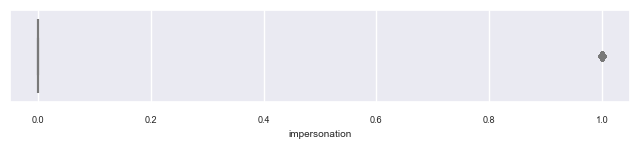

In [144]:
plt.figure(figsize=(8,1.2))
plt.ticklabel_format(style='plain')
sns.boxplot(x=df_tweets['impersonation'], color="lightblue")

### Piechart (matplotlib)

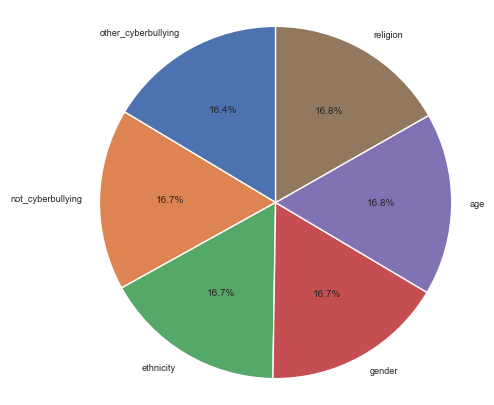

In [145]:
# Group data by rooms (only the 8 most frequently occurencies by rooms)
df_bar = df_tweets.cyberbullying_type.value_counts().nlargest(8).sort_values(ascending=True)

# Simple bar chart
sizes = list(df_bar.values)
labels = list(df_bar.index.values)

fig1, ax1 = plt.subplots(figsize=(5,5))
ax1.pie(sizes, 
        labels=labels, 
        autopct='%1.1f%%',
        shadow=False, 
        startangle=90)
ax1.axis('equal')  # ensures that pie is drawn as a circle.

plt.show()

# Graphical Multivariate EDA
Most Graphics like Scatterplots, Regressionlines, Matrices, Hexagonal binning plots or Correlation heatmaps don't make sense, as the values are mostly 0 or 1.

### Example Correlation heatmap:

<Axes: >

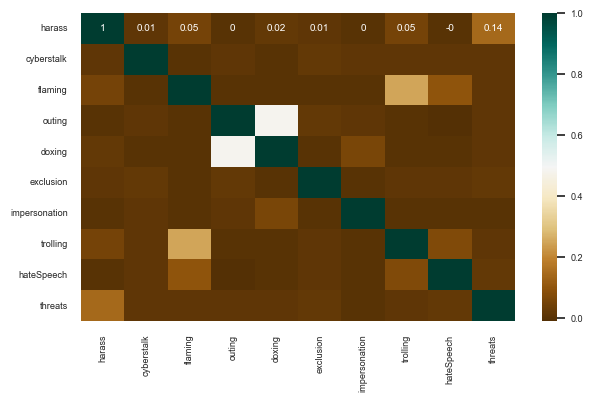

In [146]:
# Set font size for plot
sns.set(font_scale=0.6)

# Create correlation matrix as the basis for the heatmap
plt.figure(figsize=(7,4))
corr = df_tweets[['harass', 'cyberstalk', 'flaming', 'outing', 'doxing', 'exclusion', 'impersonation', 'trolling', 'hateSpeech', 'threats']].corr().round(2)

# Plot heatmap
sns.heatmap(corr, 
            cmap="BrBG", 
            annot=True)